# Opérateurs connexes et segmentation

In [19]:
# Importrataion des bibliothèques 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import cv2
from collections import deque, defaultdict
from typing import List, Tuple, Set, Dict, Callable
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("Les bibliothèques sont bien importés !")

Les bibliothèques sont bien importés !


## Adjacence 

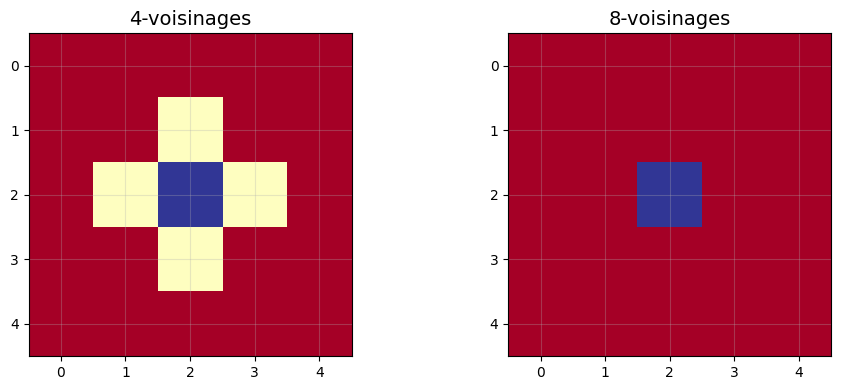

Visualisation des 4-voisinages et 8-voisinages terminée !


In [20]:
# visualisation
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# 4-voisinages 
grid_4 = np.zeros((5,5))
grid_4[2, 2] = 2
grid_4[[1, 3, 2, 2], [2, 2, 1, 3]]= 1

axes[0].imshow(grid_4, cmap='RdYlBu', vmin = 0, vmax = 2)
axes[0].set_title("4-voisinages", fontsize=14)
axes[0].grid(True, alpha=0.3)

# 8-voisinages
grid_8 = np.zeros((5,5))
grid_8[2, 2] = 2
grid_8[[0,0,0,1,1,3,3,3], [0,2,4,0,4,0,2,4]] = 0

axes[1].imshow(grid_8, cmap='RdYlBu', vmin = 0, vmax = 2)
axes[1].set_title("8-voisinages", fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualisation des 4-voisinages et 8-voisinages terminée !")


# Composantes connexes

In [21]:
class Adjacence:
    """Classe afin de définir les voisinages 4 et 8."""
    NEIGHBORS_4 = [(-1, 0), (0, -1), (0, 1), (1, 0)]
    NEIGHBORS_8 = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    @staticmethod
    def get_neighbors_4(r, c, h, w):
        return [(r+dr, c+dc) for dr, dc in Adjacence.NEIGHBORS_4
            if 0<= r+dr < h and 0<= c+dc < w]

    @staticmethod
    def get_neighbors_8(r, c, h, w):
        return [(r+dr, c+dc) for dr, dc in Adjacence.NEIGHBORS_8
            if 0<= r+dr < h and 0<= c+dc < w]

    print("Classe Adjacence définie avec succès !")


Classe Adjacence définie avec succès !


## Exercice 1 : Etiquetage en composantes connexes

Image binaire:
[[1 1 0 0 1]
 [1 0 0 1 1]
 [0 0 0 1 0]
 [1 1 0 0 0]
 [1 0 0 1 1]]

4-adjacence: 1 composantes connexes détectées
[[1 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

8-adjacence: 4 composantes connexes détectées
[[1 1 0 0 2]
 [1 0 0 2 2]
 [0 0 0 2 0]
 [3 3 0 0 0]
 [3 0 0 4 4]]


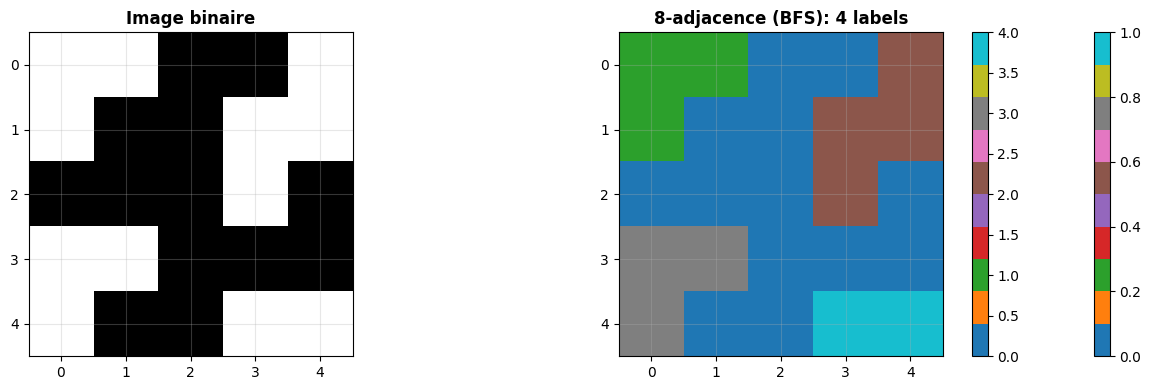

In [15]:
def ccLabel_DFS(binary_image, connectivity='4'):
    h, w = binary_image.shape
    labels = np.zeros((h, w), dtype=np.int32)
    current_label = 0
    get_neighbors = (Adjacence.get_neighbors_4 if connectivity == '4'
                    else Adjacence.get_neighbors_8)

    for r in range(h):
        for c in range(w):
            if binary_image[r, c] > 0 and labels[r, c] == 0:
                current_label += 1
                stack = [(r, c)]

                while stack:
                    cr, cc = stack.pop()
                    if labels[cr, cc] != 0:
                        continue
                    labels[cr, cc] = current_label

                    for nr, nc in get_neighbors(cr, cc, h, w):
                        if binary_image[nr, nc] > 0 and labels[nr, nc] == 0:
                            stack.append((nr, nc))

                return labels

    print("Fonction définie avec succès !")


def ccLabel_BFS(binary_image, connectivity='4'):
    h, w = binary_image.shape
    labels = np.zeros((h, w), dtype=np.int32)
    current_label = 0
    get_neighbors = (Adjacence.get_neighbors_4 if connectivity == '4'
                    else Adjacence.get_neighbors_8)

    for r in range(h):
        for c in range(w):
            if binary_image[r, c] > 0 and labels[r, c] == 0:
                current_label += 1
                queue = deque([(r, c)])
                labels[r, c] = current_label

                while queue:
                    cr, cc = queue.popleft()
                    for nr, nc in get_neighbors(cr, cc, h, w):
                        if binary_image[nr, nc] > 0 and labels[nr, nc] == 0:
                            labels[nr, nc] = current_label
                            queue.append((nr, nc))
    return labels


test_image = np.array([
    [1, 1, 0, 0, 1],
    [1, 0, 0, 1, 1],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 1, 1]
], dtype=np.uint8)

labels_dfs_4 = ccLabel_DFS(test_image, connectivity='4')
labels_bfs_8 = ccLabel_BFS(test_image, connectivity='8')

print("Image binaire:")
print(test_image)
print(f"\n4-adjacence: {labels_dfs_4.max()} composantes connexes détectées")
print(labels_dfs_4)
print(f"\n8-adjacence: {labels_bfs_8.max()} composantes connexes détectées")
print(labels_bfs_8)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].imshow(test_image, cmap='gray')
axes[0].set_title('Image binaire', fontweight='bold')
axes[0].grid(True, alpha=0.3)

im1 = axes[1].imshow(labels_dfs_4, cmap='tab10')
axes[1].set_title(f'4-adjacence (DFS): {labels_dfs_4.max()} labels', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(im1, ax=axes[1])

im2 = axes[1].imshow(labels_bfs_8, cmap='tab10')
axes[1].set_title(f'8-adjacence (BFS): {labels_bfs_8.max()} labels', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()


## Exercice 2 : Filtre d'aire

In [6]:
def AreaFilter(binary_image, min_area, connectivity='4'):
    labels = ccLabel_DFS(binary_image, connectivity)
    areas = np.bincount(labels.flatten())
    output_image = binary_image.copy()

    for label in range(1, len(areas)):
        if areas[label] < min_area:
            output_image[labels == label] = 0

    return output_image, areas

# TEST
test_img_2 = np.zeros((10, 10), dtype=np.uint8)
test_img_2[0:3, 0:5] = 1
test_img_2[5, 5:7] = 1
test_img_2[7:9, 2:6] = 1

min_area = 3
filtered, areas = AreaFilter(test_img_2, min_area)

print("Image originale:")
print(test_img_2)
print(f"\nAires par composantes: {areas}")
print(f"\nAprès filtrage (min_area={min_area}):")
print(filtered)

labels_b = ccLabel_DFS(test_img_2)
labels_a = ccLabel_DFS(filtered)
print(f"\nComposantes avant filtrage: {labels_b.max()}")
print(f"Composantes après filtrage: {labels_a.max()}")
print(f"Supprimées: {labels_b.max() - labels_a.max()}")

Image originale:
[[1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Aires par composantes: [85 15]

Après filtrage (min_area=3):
[[1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Composantes avant filtrage: 1
Composantes après filtrage: 1
Supprimées: 0


## Exercice 3 : Etiquetage en composantes connexes - Mieux

Résulats :
DFS : 1 composantes
2-pass : 12 composantes

Résultats DFS:
[[1 1 0 0 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Résultats 2-pass:
[[ 0  1  0  0  2]
 [ 4  2  0  3  0]
 [ 0  4  0  5  6]
 [ 0  0  0  0  7]
 [ 8  9  0 12  9]]


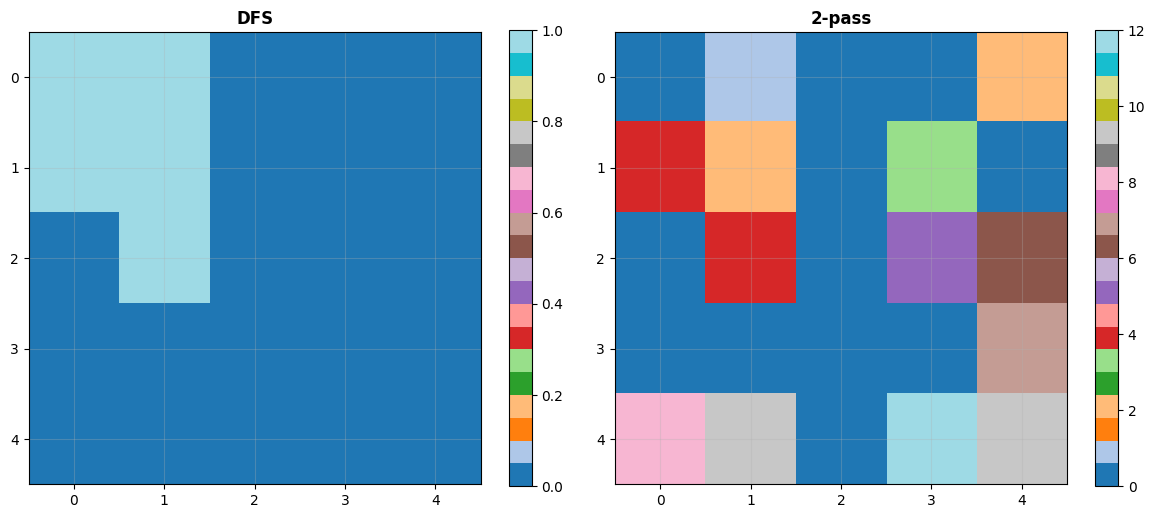

In [ ]:
class Label_2:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx != ry:
            if self.rank[rx] < self.rank[ry]:
                self.parent[rx] = ry
            elif self.rank[rx] > self.rank[ry]:
                self.parent[ry] = rx
            else:
                self.parent[ry] = rx
                self.rank[rx] += 1

def ccTwoPassLabel(binary_image):
    h, w = binary_image.shape
    labels = np.zeros((h, w), dtype=np.int32)
    current_label = 0
    uf = Label_2(h * w)

    # Première passe
    for r in range(h):
        for c in range(w):
            if binary_image[r, c] > 0:
                top = labels[r-1, c] if r > 0 else 0
                left = labels[r, c-1] if c > 0 else 0

                if top > 0 and left > 0:
                    if top > 0:
                        labels[r, c] = top
                        if left > 0 and left != top:
                            uf.union(top, left)
                    else:
                        labels[r, c] = left
                else:
                    current_label += 1
                    labels[r, c] = current_label

    mapping = {i: uf.find(i) for i in range(1, current_label + 1)}
    unique = {}
    next_id = 0

    # Deuxième passe
    for r in range(h):
        for c in range(w):
            if labels[r, c] > 0:
                root = mapping[labels[r, c]]
                if root not in unique:
                    unique[root] = next_id
                    next_id += 1
                    labels[r, c] = unique[root]

    return labels


# TEST
test_img_3 = np.array([
    [1, 1, 0, 0, 1],
    [1, 1, 0, 1, 0],
    [0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1]
], dtype=np.uint8)

labels_dfs = ccLabel_DFS(test_img_3, '4')
labels_two_pass = ccTwoPassLabel(test_img_3)

print("Résulats :")
print(f"DFS : {labels_dfs.max()} composantes")
print(f"2-pass : {labels_two_pass.max()} composantes")
print(f"\nRésultats DFS:\n{labels_dfs}")
print(f"\nRésultats 2-pass:\n{labels_two_pass}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im1 = axes[0].imshow(labels_dfs, cmap='tab20')
axes[0].set_title('DFS', fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(labels_two_pass, cmap='tab20')
axes[1].set_title('2-pass', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()




## Segmentation

# Exercice 4 : Seuillage par histogramme et méthode d’Otsu

In [ ]:
def compute_histogram(image):
    histogramm = np.bincount(image.flatten(), minlength=256)
    return histogramm.astype(float) / histogramm.sum()

def threshold_otsu(image):
    histogramm = compute_histogram(image)
    total_mean = np.sum(np.arange(256) * histogramm)

    max_variance = 0
    optimal_threshold = 0
    w0 = 0 
    mean0 = 0

    for t in range(256):
        w0 += histogramm[t]
        if w0 == 0:
            continue
        w1 = 1-w0
        if w1 == 0:
            break
        mean0 += t * histogramm[t]
        mean1 = (total_mean - mean0) / w1

        variance = w0 * w1 * (mean0 / w0 - mean1) ** 2

        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t
        return optimal_threshold, max_variance
    
# TEST
np.random.seed(42)
class1 = np.random.normal(80, 10, 1000).astype(np.uint8)
class2 = np.random.normal(180, 10, 5000).astype(np.uint8)

pixels = np.concatenate((class1, class2))
np.random.shuffle(pixels)
modal_image = pixels.reshape((100, 60))

threshold, variance = threshold_otsu(modal_image)
binary = (modal_image >= threshold).astype(np.uint8) * 255

print(f"Seuil Otsu: {threshold}")
print(f"Variance: {variance}")
print(f"Pixels blancs: {np.sum(binary > 0)}")

Seuil Otsu: 47
Variance: 2.2351452606730744
Pixels blancs: 6000
